In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import gensim

from gensim.models.word2vec import Word2Vec
from konlpy.tag import Kkma


#word2벡터 부분
model= Word2Vec()

vocab,vocab_vector = model.wv.vocab(), model[vocab]


n_cluster = 20
inertia_list = []


RuntimeError: you must first build vocabulary before training the model

In [4]:
d

In [8]:
for i in range(3,n_cluster):

    km = KMeans(n_clusters=i)

    km.fit(vecs)
    
    inertia_list.append(km.inertia_)

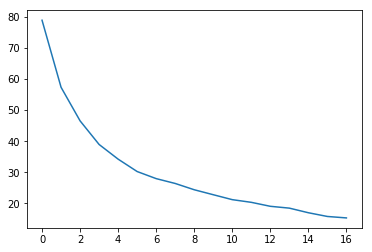

In [9]:
plt.plot(inertia_list)
plt.show() # 여기서 5처럼 갑자기 경사가 낮아지는곳 정하기

In [10]:
#만약에 5라면 아래를 통해 어디 클러스터에 속하는지 알수 있다.
final_cluster = 5
km = KMeans(n_clusters=final_cluster)
pred = km.fit_predict(vecs)
for i,j in zip(word,pred):
    print(i,j)

setosa0 1
setosa1 1
setosa2 1
setosa3 1
setosa4 1
setosa5 1
setosa6 1
setosa7 1
setosa8 1
setosa9 1
setosa10 1
setosa11 1
setosa12 1
setosa13 1
setosa14 1
setosa15 1
setosa16 1
setosa17 1
setosa18 1
setosa19 1
setosa20 1
setosa21 1
setosa22 1
setosa23 1
setosa24 1
setosa25 1
setosa26 1
setosa27 1
setosa28 1
setosa29 1
setosa30 1
setosa31 1
setosa32 1
setosa33 1
setosa34 1
setosa35 1
setosa36 1
setosa37 1
setosa38 1
setosa39 1
setosa40 1
setosa41 1
setosa42 1
setosa43 1
setosa44 1
setosa45 1
setosa46 1
setosa47 1
setosa48 1
setosa49 1
versicolor50 0
versicolor51 0
versicolor52 0
versicolor53 3
versicolor54 0
versicolor55 0
versicolor56 0
versicolor57 3
versicolor58 0
versicolor59 3
versicolor60 3
versicolor61 0
versicolor62 3
versicolor63 0
versicolor64 3
versicolor65 0
versicolor66 0
versicolor67 3
versicolor68 0
versicolor69 3
versicolor70 0
versicolor71 3
versicolor72 0
versicolor73 0
versicolor74 0
versicolor75 0
versicolor76 0
versicolor77 0
versicolor78 0
versicolor79 3
versicolor

In [11]:
tmp_sentences = [['setosa4','virginica141'],
                ['virginica126','versicolor86']] # 절별로 짜른거

In [12]:
res_sentences = []
for tmp_sentence in tmp_sentences:
    tmp_list=[]
    for i in tmp_sentence:
        tmp_list.append(pred[word.index(i)])
#     print(tmp_list)
    res_sentences.append(np.bincount(tmp_list,minlength=final_cluster))
np.array(res_sentences)

array([[0, 1, 1, 0, 0],
       [2, 0, 0, 0, 0]], dtype=int64)

In [40]:
def load_lex_dict():
    positive_dict=['virginica141','좋','괜찮','진리','천재','꿀','짱','강추','장점','최고']
    negative_dict=['versicolor86','힘들','벅차','무섭','귀찮','바쁘','아갑','늦','아쉽','두렵','별로']
    return positive_dict,negative_dict

positive_dict,negative_dict = load_lex_dict()
def what_pos(sentence):
    pos_case=[]
    
    for pd in positive_dict:
        if pd in sentence:
            print(pd)
            pos_case.append(pd)
    return pos_case

def what_neg(sentence):
    neg_case=[]
    for nd in negative_dict:
        if nd in sentence:
            print(nd)
            neg_case.append(nd)
    return neg_case

def senetene_labelling(ex_sentences):
    
    res_list=[]
    for i,sentence in enumerate(ex_sentences):
        
        tmp_list=[]
        
        pos_list = what_pos(sentence)
        neg_list = what_neg(sentence)
        
        res_list.append(float(len(pos_list) >= len(neg_list)))
    
        print(sentence,len(pos_list),len(neg_list))


#         res_list.append([sentence,len(pos_list),len(neg_list)])
            
#         # debug
#         print(i,'번째 문장: ',sentence)

#         print('--positive case--\n',pos_list)

#         print('\n\n')

#         print('--negative case--\n',neg_list)

#         print('\n\n')
    return res_list


In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader

In [42]:
X = np.array(res_sentences)
y = senetene_labelling(tmp_sentences)
    
# y = np.ones(len(X)) # 우리가 아직 라벨링을 안했으니까 임시로
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

batchSize=1
learningRate = 0.01
epochNum = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

virginica141
['setosa4', 'virginica141'] 1 0
versicolor86
['virginica126', 'versicolor86'] 0 1


[[0 1 1 0 0]
 [2 0 0 0 0]] [1.0, 0.0]


In [87]:
class Mydataset(Dataset):
    
    def __init__(self,train_or_test="train"):
        if train_or_test == "train":
            self.X=X_train
            self.y=y_train
        elif train_or_test == "test":
            self.X=X_test
            self.y=y_test
        else:
            self.X=X
            self.y=y
    def __getitem__(self,index):
        return torch.from_numpy(X[index]).type(torch.FloatTensor),y[index]
    
    def __len__(self):
        return len(self.y)

In [88]:
train_dataset = Mydataset('train')
train_loader = DataLoader(train_dataset,batch_size=batchSize,shuffle=True)

test_dataset = Mydataset('test')
test_loader = DataLoader(test_dataset,batch_size=batchSize,shuffle=True)

tmp_dataset=Mydataset('tmp')
tmp_loader=DataLoader(tmp_dataset,batch_size=2,shuffle=True)

In [89]:
class Mynet(nn.Module):
    
    def __init__(self):
        super(Mynet, self).__init__()
        
        #self.hidden1 = nn.Linear(final_cluster,10)
        self.output = nn.Linear(5,1)
    
    def forward(self, x):
#         z = self.hidden1(x)
#         z = nn.Sigmoid(z)
        z = self.output(x)
        
        return z
        

In [95]:
model = Mynet()
model.train()                                                          
costFunction = nn.BCELoss()                                   
optimizer = torch.optim.Adam(model.parameters(), lr = learningRate)    

totalStep = len(train_loader)

In [100]:
from torch.autograd import Variable

for epoch in range(epochNum):
    print('epoch: ',epoch)
    for idx, (sen_bins, labels) in enumerate(tmp_loader):
        
        tmp_X = Variable(sen_bins)
        tmp_y = labels
        
        #labels = labels.view(-1,1)
        # Forward pass
        print('before outputs')
        outputs = model(tmp_X)    
        loss = costFunction(outputs, tmp_y.float()) 
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (idx + 1) % 100 == 0:
            
            print("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}".format(epoch + 1, epochNum, idx + 1, totalStep, loss.item()))

epoch:  0
before outputs
epoch:  1
before outputs
epoch:  2
before outputs
epoch:  3
before outputs
epoch:  4
before outputs
epoch:  5
before outputs
epoch:  6
before outputs
epoch:  7
before outputs
epoch:  8
before outputs
epoch:  9
before outputs


C:\Users\jyh54\Anaconda3\lib\site-packages\torch\nn\functional.py:1594: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


In [ ]:
print("hi")